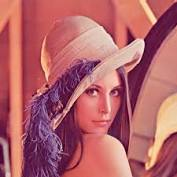

In [116]:
import numpy as np
from PIL import Image, ImageFilter
img1=Image.open('input_image.jpeg')
img1

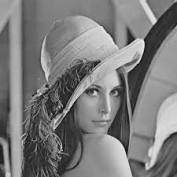

In [117]:
img1bw=img1.convert(mode='L')
img1bw

In [118]:
img1arr=np.array(img1bw)
img1arr

array([[160, 160, 160, ..., 141, 177, 155],
       [159, 159, 159, ..., 150, 151, 132],
       [157, 157, 157, ..., 117,  93,  66],
       ...,
       [ 48,  45,  56, ...,  67,  69,  86],
       [ 52,  47,  56, ...,  73,  85,  93],
       [ 47,  50,  55, ...,  87, 100, 104]], dtype=uint8)

In [119]:
rows=len(img1arr)
cols=len(img1arr[0])
if cols%2!=0:
    img1arr=np.delete(img1arr,[-1],axis=1) #odd no. of cols. so removed last col.
cols=len(img1arr[0]) #new col len
for i in range(rows):
    for j in range(cols):
        if i%2!=0:
            if j%2!=0:
                img1arr[i][j]=0
        if i%2==0:
            if j%2==0:
                img1arr[i][j]=0
img1arr

array([[  0, 160,   0, ..., 112,   0, 177],
       [159,   0, 159, ...,   0, 150,   0],
       [  0, 157,   0, ..., 132,   0,  93],
       ...,
       [  0,  45,   0, ...,  56,   0,  69],
       [ 52,   0,  56, ...,   0,  73,   0],
       [  0,  50,   0, ...,  71,   0, 100]], dtype=uint8)

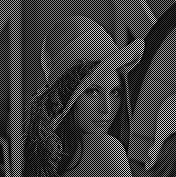

In [120]:
img2arr=img1arr.copy()
img2=Image.fromarray(img2arr)
img2

In [121]:
img3arr=[]
for i in range(rows):
    for j in range(cols):
        if i%2!=0:
            if j%2==0:
                img3arr.append(img1arr[i][j])
        elif i%2==0:
            if j%2!=0:
                img3arr.append(img1arr[i][j])
img3arr=np.reshape(img3arr,(-1,cols//2)) #cols become half their size and rows will take shape accordingly
img3arr

array([[160, 160, 160, ..., 124, 112, 177],
       [159, 159, 159, ..., 123, 116, 150],
       [157, 157, 157, ..., 120, 132,  93],
       ...,
       [ 45,  56, 135, ...,  57,  56,  69],
       [ 52,  56,  66, ...,  55,  45,  73],
       [ 50,  46, 130, ...,  48,  71, 100]], dtype=uint8)

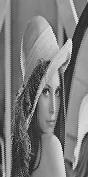

In [122]:
img3=Image.fromarray(img3arr)
img3 #img3 sent

In [123]:
#img3 recd. needs to be restored to original size
rows1=len(img3arr)
cols1=len(img3arr[0])*2
img4arr=np.zeros((rows1,cols1),dtype='uint8')
for i in range(rows1):
    for j in range(cols1):
        if i%2!=0:
            if j%2==0:
                img4arr[i][j]=img3arr[i][j//2]
        elif i%2==0:
            if j%2!=0:
                img4arr[i][j]=img3arr[i][j//2]
img4arr

array([[  0, 160,   0, ..., 112,   0, 177],
       [159,   0, 159, ...,   0, 150,   0],
       [  0, 157,   0, ..., 132,   0,  93],
       ...,
       [  0,  45,   0, ...,  56,   0,  69],
       [ 52,   0,  56, ...,   0,  73,   0],
       [  0,  50,   0, ...,  71,   0, 100]], dtype=uint8)

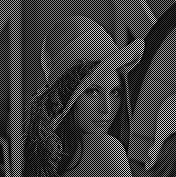

In [124]:
img4=Image.fromarray(img4arr)
img4

implementing stage 2 of restoration:


168


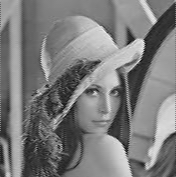

In [125]:
print(img4arr[0][-1]//2 + img4arr[0][(1)%cols1]//2)
for i in range(rows1):
    for j in range(cols1):
        if img4arr[i][j] == 0:
            # if j == cols1 - 1:
            #     img4arr[i][j] = (img4arr[i][j-1] + img4arr[i][0])//2
            # else:
            #     img4arr[i][j] = (img4arr[i][j-1] + img4arr[i][j+1])//2
            img4arr[i][j] = img4arr[i][j-1]//2 + img4arr[i][(j+1)%cols1]//2
img4 = Image.fromarray(img4arr)
img4

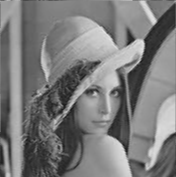

In [126]:
finimg = np.zeros((rows1,cols1),dtype='uint8')
for i in range(cols1):
    for j in range(rows1):
        finimg[j][i] = img4arr[j-1][i]//2 + img4arr[j][i]//2
img4 = Image.fromarray(finimg)
img4